In [1]:
import sys
sys.path.append('/home/alysha/Downloads')


In [1]:
"""
Created on Mon Dec  4 10:55:54 2017

@author: alyshadesouza
"""

 
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#import thllib #import util
import figurefirst as fifi
from scipy import signal




In [2]:
%matplotlib inline



In [3]:
flydir = '/home/alysha/media/imager/FlyDataD/untitled folder/recent_muscle_reocrdings_thru_12_13_18/'
localfile = flydir + '2018_12_06_0012.abf'

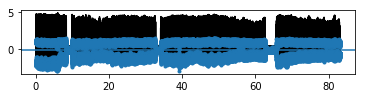

In [4]:
#flydir = '/home/alysha/media/imager/FlyDataD/lysh_ephys_ata_old/'
#flydir = '/home/alysha/media/imager/FlyDataD/brad_b2_data/'

#localfile = flydir + '2018_03_05_0024.abf'
#localfile = flydir + '2018_10_29_0009.abf'
#localfile = flydir + '2018_10_30_0012.abf'
 
r =AxonIO(localfile)
 
bl = r.read_block(lazy=False, cascade=True)
 
hutch = np.asarray(bl.segments[0].analogsignals[5])
 
fs_axon = 1.0/20000.0
 
times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))
 
# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)
 
ax1 = plt.subplot(311)
 
ax1.plot(times,hutch_det,'k')
 
#identify all relative minima
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch_det[inds], '.')
ax1.axhline(-0.08)
inds = np.array(inds)
inds = np.transpose(inds)


In [7]:
'''
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
##make sure to sore this spike signal again -- messy input from B1, B2 and iii3
####i1_ca = fly.ca_camera_left_model_fits['i1']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F
'''

"\nabf_sp = fly.abf_times[1] #abf spike period\nca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs\n\n#get the idx's where the ca data is aquired\nep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]\nstart = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period \nstop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)\n\n#make a time array for the recording epoch\nep_times = np.array(fly.abf_times[start:stop])\nep_times -= ep_times[0]\n\n#load this into memory since I will use it quite a bit\nspike_sig = np.array(fly.abf_electrode[start:stop])\n##make sure to sore this spike signal again -- messy input from B1, B2 and iii3\n####i1_ca = fly.ca_camera_left_model_fits['i1']\n## another way of extracting b1 activity\n#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))\n#F = np.percentile(F_,0.01)\n#DF_F = (F_-F)/F\n#b1_ca = DF_F\n"

/home/alysha/.local/lib/python2.7/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


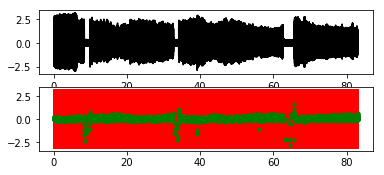

In [5]:
 
## identify the ventral flip of each wingbeat by applying a threshold
thresh = -.01 #adjust as needed
flipInds = []
flipInds = np.argwhere(hutch_det[inds]>thresh)
flipInds = inds[flipInds]
flipInds = flipInds[:,0]
 
#% now find the phase of the ventral flip 
 
#filter hütchen signal to make it more sinusoidal
 
from scipy import signal
from scipy.signal import butter, lfilter, freqz
 
def butter_lowpass(highcut, fs, order=4):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 
# Filter requirements.
order = 4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 300.0  # desired cutoff frequency of the filter, Hz
 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(highcut, fs, order)
 
 
hutch_filt = signal.filtfilt(b, a, hutch_det)
 
ax2 = plt.subplot(312, sharex=ax1)
 
ax2.plot(times,hutch_filt,'k')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
hutch_analytic = hilbert(hutch_filt)
inst_phase = np.angle(hutch_analytic)
 
 
ax3 = plt.subplot(313, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,hutch_analytic,'k')
ax3.plot(times,inst_phase,'r')
ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

#%matplotlib inline 
#%pylab inline
#%matplotlib inline


import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
#from constrained_foopsi import *
#%matplotlib inline

In [7]:
import sys


In [8]:
!pwd
#%matplotlib inline  

/home/alysha/analysis_files/S37


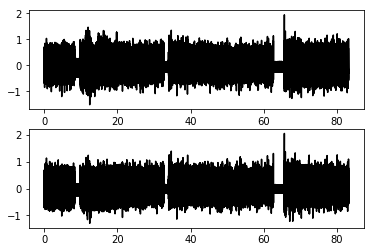

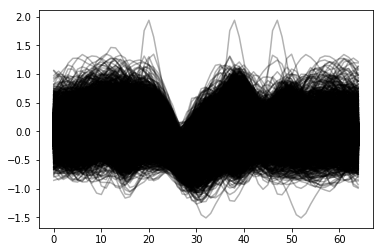

In [6]:
#%% detect muscle spikes and sort them
 
musc = np.asarray(bl.segments[0].analogsignals[0])
 
plt.figure(2)
ax1 = plt.subplot(211)
ax1.plot(times,musc,'k')
 
#apply median filter and detrend muscle signal
 
musc_det = musc-signal.medfilt(musc,35)
 
ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(times,musc_det,'k')
 
# threshold the detrended signal (convert the spikes into binary)
# calculate the change in, identify the spike starts/stops 
#thresh = 4
thresh = 0.25 #0.6
deltas = np.diff(np.array(-1*musc_det>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
intervals = np.hstack((starts,stops))
spiketimes = [np.argmax(musc[sta:stp])+sta for sta,stp in intervals][2:-2]
waveforms = [musc[pk-25:pk+40] for pk in spiketimes]
 
#plot the collected waveforms
plt.figure(3)
for i in range(len(waveforms)):
    plt.plot(waveforms[i], 'k', alpha = 0.3)
 
wv_mtrx = np.vstack([np.array(wv) for wv in waveforms])



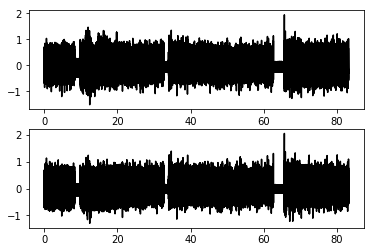

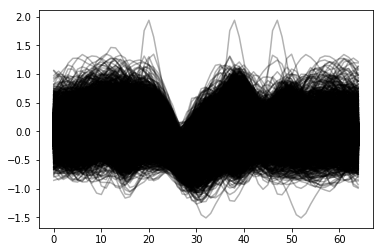

In [7]:
####duplicate

#%% detect muscle spikes and sort them
 
musc = np.asarray(bl.segments[0].analogsignals[0])
 
plt.figure(2)
ax1 = plt.subplot(211)
ax1.plot(times,musc,'k')
 
#apply median filter and detrend muscle signal
 
musc_det = musc-signal.medfilt(musc,35)
 
ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(times,musc_det,'k')
 
# threshold the detrended signal (convert the spikes into binary)
# calculate the change in, identify the spike starts/stops 
#thresh = 4
thresh = 0.25 #0.6
deltas = np.diff(np.array(-1*musc_det>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
intervals = np.hstack((starts,stops))
spiketimes = [np.argmax(musc[sta:stp])+sta for sta,stp in intervals][2:-2]
waveforms = [musc[pk-25:pk+40] for pk in spiketimes]
 
#plot the collected waveforms
plt.figure(3)
for i in range(len(waveforms)):
    plt.plot(waveforms[i], 'k', alpha = 0.3)
 
wv_mtrx = np.vstack([np.array(wv) for wv in waveforms])





In [ ]:
#%matplotlib inline


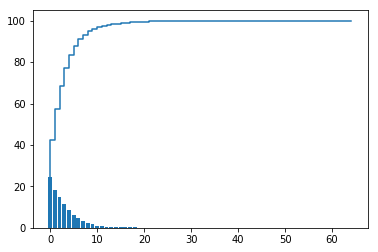

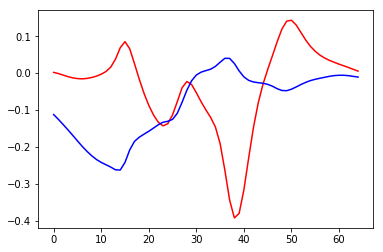

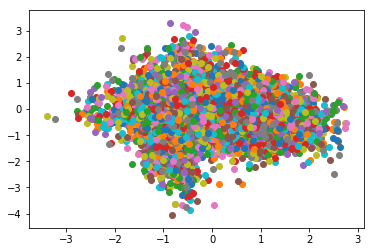

In [8]:
#%% extract the features of the waveforms to cluster the data
 
cov_wav = np.cov(wv_mtrx.T)
eig_vals, eig_vecs = np.linalg.eig(cov_wav)
#for ev in eig_vecs:
    #np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
 
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
 
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
 
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
 
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
 
plt.figure(4)
plt.bar(range(65), var_exp)
plt.step(range(65), cum_var_exp)
 
#contruct the projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(65,1),
                      eig_pairs[1][1].reshape(65,1)))
 
plt.figure(5)
plt.plot(matrix_w[:,0],'r')
plt.plot(matrix_w[:,1],'b')
 
plt.figure(6)
proj = []
proj1 = []
proj2 =[]
for i in range(len(wv_mtrx)):
    musc_proj = np.dot(wv_mtrx[i], matrix_w)
    proj.append(musc_proj[0])
    proj1.append(musc_proj[1])
    proj2.append(musc_proj)
    plt.scatter(musc_proj[0], musc_proj[1])
 
     
X = np.array(list(zip(proj, proj1)))
 
    

[[-0.58300507 -0.09346047]]


' \ntest3 = np.argwhere(labels=0)\n \nfor i in range(len(test3)):\n    plt.plot(wv_mtrx[test3[i]])\n'

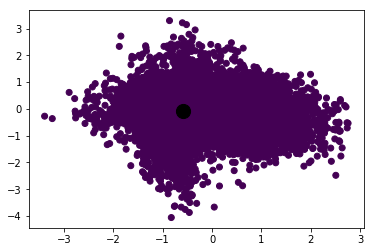

In [9]:
#%%
from sklearn.cluster import KMeans
 
# Number of clusters
#kmeans = KMeans(n_clusters=2)
#n_clusters=1
n_clusters=1
kmeans = KMeans(n_clusters=1)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_
 
#print(C) 
print(centroids)
 
plt.figure(7)
plt.scatter(X[:, 0], X[:, 1], c=labels)
 
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200);
 
""" 
test3 = np.argwhere(labels=0)
 
for i in range(len(test3)):
    plt.plot(wv_mtrx[test3[i]])
"""
    

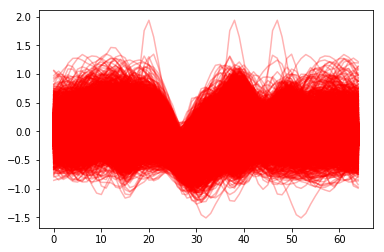

In [10]:
#%%


###### categorize and plot the labels 

labeled_spikes= zip(spiketimes,labels)


def cutoff(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_a_spikes = cutoff(0.5, labeled_spikes)

def cutoff_2(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

Type_b_spikes = cutoff_2(0.5, labeled_spikes)



#print(zip_hutch)
#
#x_val = [x[0] for x in Type_a_spikes]
#y_val = [x[1] for x in Type_a_spikes]

x_val_b = [x[0] for x in Type_b_spikes]
y_val_b = [x[1] for x in Type_b_spikes]



#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]
 
#plot the collected waveforms
#plt.figure(3)
#for i in range(len(labeled_waveforms_type_a)):
#    plt.plot(labeled_waveforms_type_a[i], 'b', alpha = 0.3)

plt.figure(3)
for i in range(len(labeled_waveforms_type_b)):
    plt.plot(labeled_waveforms_type_b[i], 'r', alpha = 0.3)
    
#go back and plot the labeled peaks
#find old code on old computer for this
#improve documentation for this



In [12]:
crimson = np.asarray(bl.segments[0].analogsignals[12])  #7

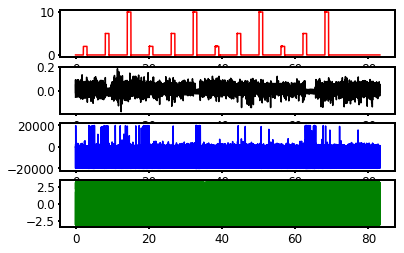

In [45]:
#%%

###Use Hilbert function againt o calculate the instantaneous freq. of B2

plt.figure(12)

# Filter requirements.
order = 10  #4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 200.0  # desired cutoff frequency of the filter, Hz



def butter_lowpass_1(highcut, fs, order=10):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 

 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass_1(highcut, fs, order)
 
 
muscb2_filt = signal.filtfilt(b, a, musc_det)

ax1 = plt.subplot(411)
ax1.plot(times, crimson, 'r')
 
ax2 = plt.subplot(412, sharex=ax1)
 
ax2.plot(times,muscb2_filt,'k')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
musc_analytic = hilbert(muscb2_filt)
inst_phase = np.angle(musc_analytic)

#instantaneous_phase = np.unwrap(np.angle(musc_analytic))
instantaneous_frequency = (np.diff(inst_phase) /(2.0*np.pi) * fs)
 
ax3 = plt.subplot(413, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,musc_analytic,'k')
#ax3.plot(times,inst_phase,'r')

times_freq = np.delete(times, 1662975)

ax3.plot(times_freq, instantaneous_frequency, 'b')
#ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(times, inst_phase, 'g')



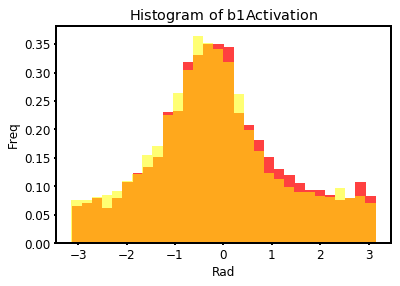

In [46]:
#With crimson light!

crimson = np.asarray(bl.segments[0].analogsignals[12])  #7


plt.figure(13)
ax1 = plt.subplot(111)

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#split via crimson

#ax1.plot(times,crimson,'r')
#plt.fill_between(times[inds],crimson[inds])

#crimson_labeled_spikes_0= zip(inst_phase[x_val], crimson[x_val], musc[x_val])
crimson_labeled_spikes_2= zip(inst_phase[x_val_b], crimson[x_val_b], musc[x_val_b])


def cutoff_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] > threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
Spikes_2_crimson = cutoff_crimson(.8, crimson_labeled_spikes_2)

def cutoff_no_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] < threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_0)
Spikes_2_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_2)



#print(zip_hutch)


#x_val_crimson_1 = [x[0] for x in Spikes_1_crimson]
x_val_crimson_2 = [x[0] for x in Spikes_2_crimson] #COMPARING PHASE


#x_val_no_crim_1 = [x[0] for x in Spikes_1_no_crimson]

x_val_no_crim_2 = [x[0] for x in Spikes_2_no_crimson]



#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

#labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]


#hist_crimson_spikes = x_val_crimson_1 
#hist_no_crimson_spikes = x_val_no_crim_1 

hist_crimson_spikes = x_val_crimson_2
hist_no_crimson_spikes = x_val_no_crim_2

matplotlib.pyplot.hist(hist_crimson_spikes, bins=30, normed=1, facecolor='red', alpha=0.75)
matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=30, normed=1, facecolor='yellow', alpha=0.55)

####for B2
#matplotlib.pyplot.hist(hist_crimson_spikes, bins=60, normed=1, facecolor='red', alpha=0.75)
#matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=60, normed=1, facecolor='yellow', alpha=0.55)



#mu, sigma = 100, 15
bins = 100
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(musc_det[x_val_0], 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Rad')
plt.ylabel('Freq')
plt.title(r'$\mathrm{Histogram\ of\ b1  Activation}$')
#plt.title(r'$\mathrm{Histogram\ of\ b2  Activation}$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(False)

plt.show()

# sanity check: just plot instantaneous phase over the whole experiment
#plt.figure(14)
#plt.plot(inst_phase[x_val_b], 'k')


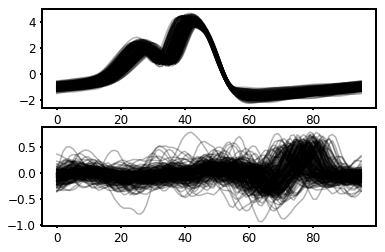

In [47]:
#%% gather a subset of the hütchens before and during a stimulus period to display them overlaid

hutch_seg = hutch[928548:948438]
musc_seg = musc[928548:948438]

deltas = np.diff(np.array(-1*hutch_det[928548:948438]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.subplot(211)
for i in range(len(hut_waveforms)):
    plt.plot(hut_waveforms[i], 'k', alpha = 0.3)
    
plt.subplot(212)
for i in range(len(musc_wave)):
    plt.plot(musc_wave[i], 'k', alpha = 0.3)


In [48]:
import pandas as pd

#flydir = '/Volumes/NO\ NAME/Data_analysis/12_15_0006/'
#flydir = '~/csv_files/2018_03_26_0008/'

flydir_save = '/home/alysha/analysis_files/S104/csv/'

hist_crimson_spikes = pd.DataFrame((hist_crimson_spikes))
#hist_crimson_spikes.to_csv(flydir + 't4/hist_crimson_spikes.csv', index=False)
hist_crimson_spikes.to_csv(flydir_save + 'hist_crimson_spikes_s104_b1_02.csv', index=False)

hist_no_crimson_spikes = pd.DataFrame((hist_no_crimson_spikes))
#hist_no_crimson_spikes.to_csv(flydir + 't4/hist_no_crimson_spikes.csv', index=False)
hist_no_crimson_spikes.to_csv(flydir_save + 'hist_no_crimson_spikes_s104_b1_02.csv', index=False)


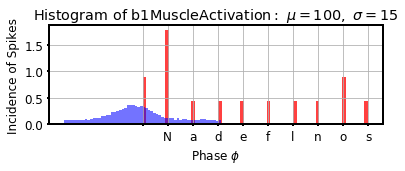

In [49]:
### Cumulative historgram or regular historgram

### for phase of B1 with and without crimson
###  degree of power muscle activation with and without crimson

#!/usr/bin/env python

plt.figure(13)
ax1 = plt.subplot(211)

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn

#split via crimson

#ax1.plot(times,crimson,'r')
#plt.fill_between(times[inds],crimson[inds])

crimson_labeled_spikes= zip(inst_phase[x_val_b], crimson[x_val_b], musc[x_val_b])


#plto inst phase


def cutoff_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] > threshold, sortedData)
    finalList3 =filter(lambda x: x[1] < threshold+0.5, finalList2)
    finalList =filter(lambda x: x[1] < 45, finalList3)
    return finalList if len(finalList) > 2 else 'No values found'

Spikes_1_crimson = cutoff_crimson(2.2, crimson_labeled_spikes)
#Spikes_2_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_2)

def cutoff_no_crimson(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList2 = filter(lambda x: x[1] < threshold, sortedData)
    finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

Spikes_1_no_crimson = cutoff_no_crimson(0.20, crimson_labeled_spikes)
#Spikes_2_no_crimson = cutoff_no_crimson(0.2, crimson_labeled_spikes_2)



#print(zip_hutch)


x_val_crimson_1 = [x[0] for x in Spikes_1_crimson]
###x_val_crimson_2 = [x[2] for x in Spikes_2_crimson]
#x_val_crimson_1 = []

x_val_no_crim_1 = [x[0] for x in Spikes_1_no_crimson]
#x_val_no_crim_1 = []
###x_val_no_crim_2 = [x[2] for x in Spikes_2_no_crimson]
#x_val_no_crim_2 = []

#labeled_waveforms_type_a = [musc[pk-25:pk+40] for pk in x_val]

#labeled_waveforms_type_b = [musc[pk-25:pk+40] for pk in x_val_b]


hist_crimson_spikes = x_val_crimson_1 #+ x_val_crimson_2
hist_no_crimson_spikes = x_val_no_crim_1 #+ x_val_no_crim_2

matplotlib.pyplot.hist(hist_crimson_spikes, bins=60, normed=1, facecolor='red', alpha=0.75)
matplotlib.pyplot.hist(hist_no_crimson_spikes, bins=60, normed=1, facecolor='blue', alpha=0.55)


#mu, sigma = 100, 15
bins = 40
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
#n, bins, patches = plt.hist(musc_det[x_val_0], 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Phase $\phi$')
plt.ylabel('Incidence of Spikes')
plt.title(r'$\mathrm{Histogram\ of\ b1 Muscle Activation:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()


(882431, 4.94812)


TypeError: 'module' object is not callable

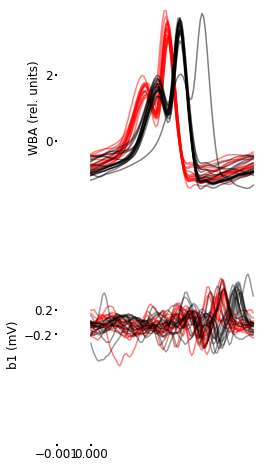

In [50]:
#### Maybe delete this


crimson = np.asarray(bl.segments[0].analogsignals[12])

indices = np.arange(len(crimson))

crimson_time= zip(indices, times, crimson)

def crimson_selection(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high = crimson_selection(4.0, crimson_time)



crimson_inds_1= zip(indices, crimson)

def crimson_selection_1(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high_1 = crimson_selection_1(4.0, crimson_inds_1)

####a
###Just take wave finder at those times!


def crimson_selection_none(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_zero_stim = crimson_selection_none(0.1, crimson_inds_1)

print(crimson_selection_high_1[0])

# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)

#hutch_seg = hutch[1260000:1263000]
#musc_seg = musc[1260000:1263000]

hutch_seg = hutch[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
musc_seg = musc[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]

deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.rc('font', size=12)
plt.rc('axes',linewidth=.5)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['axes.linewidth'] = 2

fs_axon = 1.0/20000.0
t= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('w')

ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)


ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'r', alpha = 0.5)


ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.5)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]


#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.savefig('hutch_n_spike.pdf')
plt().savefig
#gcf

(882431, 4.94812)


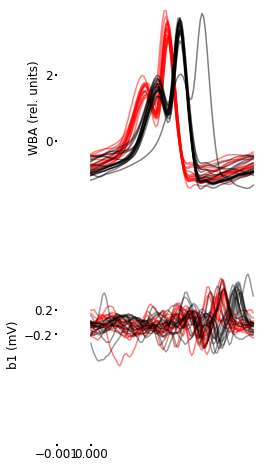

In [59]:
#### Maybe delete this

###messing around here 

crimson = np.asarray(bl.segments[0].analogsignals[12])

indices = np.arange(len(crimson))

crimson_time= zip(indices, times, crimson)

def crimson_selection(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high = crimson_selection(4.0, crimson_time)



crimson_inds_1= zip(indices, crimson)

def crimson_selection_1(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high_1 = crimson_selection_1(4.0, crimson_inds_1)

####a
###Just take wave finder at those times!


def crimson_selection_none(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_zero_stim = crimson_selection_none(0.1, crimson_inds_1)

print(crimson_selection_high_1[0])

# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)

#hutch_seg = hutch[1260000:1263000]
#musc_seg = musc[1260000:1263000]

hutch_seg = hutch[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
musc_seg = musc[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]

deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.9) #.5
stops = np.argwhere(deltas<-0.9)  #.5
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.rc('font', size=12)
plt.rc('axes',linewidth=.5)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['axes.linewidth'] = 2

fs_axon = 1.0/20000.0
t= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('w')

ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)


ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'r', alpha = 0.5)


ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.9)
stops = np.argwhere(deltas<-0.9)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]


#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.savefig('hutch_n_spike.pdf')
#plt().savefig
#gcf

(882431, 4.94812)


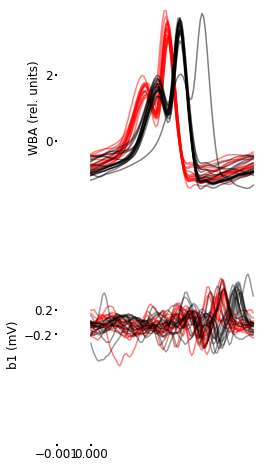

In [280]:
#### Maybe delete this

###messing around here 

crimson = np.asarray(bl.segments[0].analogsignals[12])

indices = np.arange(len(crimson))

crimson_time= zip(indices, times, crimson)

def crimson_selection(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high = crimson_selection(4.0, crimson_time)



crimson_inds_1= zip(indices, crimson)

def crimson_selection_1(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high_1 = crimson_selection_1(4.0, crimson_inds_1)

####a
###Just take wave finder at those times!


def crimson_selection_none(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_zero_stim = crimson_selection_none(0.1, crimson_inds_1)

print(crimson_selection_high_1[0])

# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)

#hutch_seg = hutch[1260000:1263000]
#musc_seg = musc[1260000:1263000]

hutch_seg = hutch[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
musc_seg = musc[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]

deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5) #.5
stops = np.argwhere(deltas<-0.95)  #.5
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] 
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]

plt.figure(2)
plt.rc('font', size=12)
plt.rc('axes',linewidth=.5)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['axes.linewidth'] = 2

fs_axon = 1.0/20000.0
t= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('w')

ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)


ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'r', alpha = 0.5)


ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)
stops = np.argwhere(deltas<-0.95)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]

###make a dictionary here and lookup table to see each of these 

huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] 

huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] 
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]


#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] 
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] #+sta
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.savefig('hutch_n_spike.pdf')
#plt().savefig
#gcf

In [290]:
#### Maybe delete this

###messing around here 

###fixing hutchens with dictionary etc...


### make dictionary for loop


crimson = np.asarray(bl.segments[0].analogsignals[12])

indices = np.arange(len(crimson))

crimson_time= zip(indices, times, crimson)

def crimson_selection(threshold, data):
    sortedData = sorted(data, key=lambda x: x[2])
    finalList = filter(lambda x: x[2] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high = crimson_selection(4.0, crimson_time)



crimson_inds_1= zip(indices, crimson)

def crimson_selection_1(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_high_1 = crimson_selection_1(4.0, crimson_inds_1)

####a
###Just take wave finder at those times!


def crimson_selection_none(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] < threshold, sortedData)
    return finalList if len(finalList) > 2 else 'No values found'

crimson_selection_zero_stim = crimson_selection_none(0.1, crimson_inds_1)

print(crimson_selection_high_1[0])

(882431, 4.94812)


In [291]:
# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)

#hutch_seg = hutch[1260000:1263000]
#musc_seg = musc[1260000:1263000]
hutch_seg_1 = hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
hutch_seg = hutch[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]
musc_seg = musc[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]

#*-1.
deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]+50:crimson_selection_high_1[0][0]+2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.9) #.5
stops = np.argwhere(deltas<-0.9)  #.5
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]

In [292]:
hut_intervals = np.hstack((starts,stops))

In [293]:
print hutch_seg_1
print hutch_seg

[-1.1894499  -1.1659514  -1.1400114  ... -0.36517006 -0.34289223
 -0.31573159]
[-1.2167358  -1.1932373  -1.1672974  ... -0.39245605 -0.37017822
 -0.34301758]


In [294]:
start_1=hut_intervals[0][0]
stop_1=hut_intervals[0][1]

In [295]:
print(hutch_seg[start_ind: stop_ind])

[ 0.9313965   1.2921143   1.819458    2.4224854   2.9785156   3.3551025
  3.4606934   3.272705    2.8405762   2.2540283   1.6119385   0.98968506
  0.42297363 -0.07202148 -0.4840088  -0.80078125 -1.015625   -1.1328125
 -1.1730957  -1.1715698  -1.1605835  -1.1575317  -1.1694336  -1.1917114
 -1.2127686  -1.2252808  -1.2265015  -1.217041   -1.1984253  -1.1761475
 -1.1535645  -1.131897   -1.1123657  -1.0943604  -1.0742188  -1.0479736
 -1.0147095  -0.9762573  -0.9347534  -0.89630127 -0.86517334 -0.8395386
 -0.81573486 -0.7904053  -0.7626343  -0.730896   -0.69885254 -0.66833496
 -0.63964844 -0.61309814 -0.5871582  -0.56030273 -0.5291748  -0.49621582
 -0.4647827  -0.43670654 -0.41290283 -0.39245605 -0.37017822]


In [296]:
print(hutch_seg_1[start_ind: stop_ind])

[ 0.9586825   1.3194002   1.846744    2.4497714   3.0058017   3.3823886
  3.4879794   3.2999911   2.8678622   2.2813144   1.6392244   1.016971
  0.45025963 -0.0447355  -0.4567228  -0.77349526 -0.988339   -1.1055266
 -1.1458098  -1.1442839  -1.1332976  -1.1302458  -1.1421477  -1.1644255
 -1.1854826  -1.1979948  -1.1992155  -1.1897551  -1.1711394  -1.1488615
 -1.1262785  -1.104611   -1.0850798  -1.0670744  -1.0469328  -1.0206877
 -0.9874235  -0.94897133 -0.9074674  -0.8690153  -0.83788735 -0.8122526
 -0.78844887 -0.7631193  -0.7353483  -0.70361    -0.67156655 -0.64104897
 -0.61236244 -0.58581215 -0.5598722  -0.53301674 -0.5018888  -0.46892983
 -0.43749672 -0.40942055 -0.38561684 -0.36517006 -0.34289223]


In [297]:
min = np.argmin(hutch_seg[start_ind: stop_ind])
print(min)

26


In [298]:
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]

hut_waveforms_list =[]
hut_waveforms_df = pd.DataFrame()
huttimes_list = []

d = {}
e = {}

for interval in range(len(hut_intervals)):
    start_ind = hut_intervals[interval][0]
    print start_ind
    stop_ind = hut_intervals[interval][1]  
    print stop_ind
    huttimes = np.argmax(hutch_seg[start_ind: stop_ind])+start_ind 
    #a = hutch_seg[start_ind: stop_ind]
    #print huttimes
    #d = a.tolist()
    #print d
    #d = np.index(max(a))
    #d = np.argmax(d)
    #print d
    
    print((hutch_seg[start_ind:stop_ind]).shape)
    print(np.argmax(hutch_seg[start_ind: stop_ind]))
    #print(np.argmax(a))
    #c = np.argmax(b)
    #d = a.tolist().index(max(a))
    #print (c)
    #print (d)
    print (huttimes)
    #huttimes = np.argmax(hutch_seg[start_ind, stop_ind]) #for sta,stp in hut_intervals][2:-2]
    #huttimes_list.append(huttimes)
    #hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
    #hut_waveforms_list.append([hutch_seg[pk-75:pk+44] for pk in huttimes])
    hutch_seg_for_dict = hutch_seg[huttimes-52:huttimes+44]
    print (hutch_seg_for_dict)
    d['hutch_segments{0}'.format(interval)]=hutch_seg_for_dict
    musc_wave_for_dict = musc_seg[huttimes-52:huttimes+44]
    print (musc_wave_for_dict)
    d['muscle_segments{0}'.format(interval)]=musc_wave_for_dict            
      
                
'''
    #prior_off_signal = crimson_off[i-1]
    if i != 0:
        if i !=len(crimson_on): 
            next_off_signal = crimson_off[i+1]
            next_on_signal = crimson_on[i+1]
            prior_off_signal = crimson_off[i-1]
            alt_f = freq_hat_upsampled[prior_off_signal: next_on_signal]
        
            f3 = signal.resample(alt_f, 10000)
            xnew3 = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)
            df_freq_upon_signal_4[i]=f3
            resampled_crim = signal.resample(crimson[prior_off_signal: next_on_signal],10000)
            resampled_times = signal.resample(times[prior_off_signal: next_on_signal],10000)
            d["fly02_i1_df{0}".format(i)]=f3
            d["fly02_crimson{0}".format(i)]=resampled_crim
            d["fly02_times{0}".format(i)]= resampled_times
            d{'item3': 3}.items())
            d{'item2': 2}.items 
'''            



df = pd.DataFrame(d)




hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.9)
stops = np.argwhere(deltas<-0.9)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]


for interval in range(len(hut_intervals)):
    start_ind = hut_intervals[interval][0]
    print start_ind
    stop_ind = hut_intervals[interval][1]  
    print stop_ind
    region= hutch_seg[start_ind: stop_ind]
    local_ind = np.argmax(region)
    print(type(hutch_seg[start_ind:stop_ind]))
    print(local_ind)
    huttimes = local_ind+start_ind 
    print huttimes
    #huttimes = np.argmax(hutch_seg[start_ind, stop_ind]) #for sta,stp in hut_intervals][2:-2]
    #huttimes_list.append(huttimes)
    #hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
    #hut_waveforms_list.append([hutch_seg[pk-75:pk+44] for pk in huttimes])
    hutch_seg_for_dict = hutch_seg[huttimes-52:huttimes+44]
    print hutch_seg_for_dict
    e['hutch_segments{0}'.format(interval)]=hutch_seg_for_dict
    musc_wave_for_dict = musc_seg[huttimes-52:huttimes+44]
    print musc_wave_for_dict
    e['muscle_segments{0}'.format(interval)]=musc_wave_for_dict 
    e['times{0}'.format(interval)]=times[huttimes-52:huttimes+44]
    
df_2 = pd.DataFrame(e)    
'''
plt.figure(2)
plt.rc('font', size=12)
plt.rc('axes',linewidth=.5)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['axes.linewidth'] = 2

fs_axon = 1.0/20000.0
t= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('w')

ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)


ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'r', alpha = 0.5)


ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]
musc_seg = musc[crimson_selection_high_1[0][0]-2000:crimson_selection_high_1[0][0]-20]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.9)
stops = np.argwhere(deltas<-0.9)
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]

###make a dictionary here and lookup table to see each of these 

#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] 

huttimes = [np.argmax(hutch_seg[sta:stp]) for sta,stp in hut_intervals][2:-2] 
#hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
#musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]
hut_waveforms = [hutch_seg[pk-75:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-75:pk+44] for pk in huttimes]


#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta: stp]) for sta,stp in hut_intervals][2:-2] 
#huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2] #+sta
#hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
#musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]
hut_waveforms = [hutch_seg[pk-75:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-75:pk+44] for pk in huttimes]


ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')


plt.savefig('hutch_n_spike.pdf')
#plt().savefig
#gcf

'''

60
114
(54,)
0
60
[-1.0458374  -1.0205078  -0.9963989  -0.9750366  -0.9588623  -0.94696045
 -0.93688965 -0.92315674 -0.9048462  -0.88256836 -0.85723877 -0.8312988
 -0.80718994 -0.78186035 -0.7507324  -0.71380615 -0.6689453  -0.6137085
 -0.546875   -0.46813965 -0.37353516 -0.26275635 -0.13702393  0.00396729
  0.16052246  0.33050537  0.5090332   0.6906128   0.8654785   1.0244751
  1.1608887   1.2634277   1.3180542   1.3098145   1.2313843   1.0845947
  0.8935547   0.7095337   0.60028076  0.6362915   0.864563    1.2869263
  1.8438721   2.4227905   2.8851318   3.1054688   3.0221558   2.6577759
  2.10083     1.4660645   0.8477783   0.30090332 -0.15991211 -0.5352783
 -0.8239746  -1.0253906  -1.1431885  -1.1889648  -1.1880493  -1.1703491
 -1.1587524  -1.1627197  -1.1798096  -1.199646   -1.2124634  -1.2136841
 -1.206665   -1.1941528  -1.1785889  -1.1636353  -1.1502075  -1.1355591
 -1.1206055  -1.105957   -1.0916138  -1.0751343  -1.0562134  -1.0351562
 -1.0101318  -0.9869385  -0.9689331  -0.9555

"\nplt.figure(2)\nplt.rc('font', size=12)\nplt.rc('axes',linewidth=.5)\nplt.rcParams['xtick.major.width'] = 2\nplt.rcParams['ytick.major.width'] = 2\nplt.rcParams['xtick.major.size'] = 2\nplt.rcParams['ytick.major.size'] = 2\nplt.rcParams['axes.linewidth'] = 2\n\nfs_axon = 1.0/20000.0\nt= np.linspace(0,len(hut_waveforms[0])/(1/fs_axon),len(hut_waveforms[0]))\n\nfig = plt.figure(figsize=(8,8))\nfig.set_facecolor('w')\n\nax = fig.add_subplot(222)\n\nfor i in range(len(hut_waveforms)):\n  ax.plot(t, hut_waveforms[i], 'r', alpha = 0.5)\n\n\nax.spines['left'].set_bounds(0, 2)\nax.set_ylim((-2, 4))\nax.set_xlim((-0.001, .005))\nax.set_yticks([])\nax.set_xticks([])\nax.tick_params(axis='both', which='major', pad=2)\n\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\nax.spines['bottom'].set_visible(False)\nax.spines['left'].set_visible(False)\n\nax.xaxis.set_ticks_position('bottom')\nax.yaxis.set_ticks_position('left')\n\n  \nax2 = fig.add_subplot(224)\nfor i in rang

In [222]:
'''import numpy as np

start_ind = hut_intervals[0][0]
print start_ind
stop_ind = hut_intervals[0][1]  
print stop_ind
region= hutch_seg[start_ind: stop_ind] 
print(type(region))
region = region.tolist()
a = np.argmax((region))
print(a)
#print(region.max(()))
#idx = np.where(region==region.max())[0]

#region = region.tolist()

#max_val = region.index(max(region))
#idx = np.where(region==region.max())[0]
print(region)
max = np.argmax(region)
print(max)
'''

60
114
<type 'numpy.ndarray'>
0
[-0.159912109375, -0.5352783203125, -0.823974609375, -1.025390625, -1.1431884765625, -1.18896484375, -1.18804931640625, -1.17034912109375, -1.15875244140625, -1.1627197265625, -1.1798095703125, -1.19964599609375, -1.21246337890625, -1.21368408203125, -1.2066650390625, -1.19415283203125, -1.1785888671875, -1.16363525390625, -1.15020751953125, -1.13555908203125, -1.12060546875, -1.10595703125, -1.09161376953125, -1.07513427734375, -1.05621337890625, -1.03515625, -1.0101318359375, -0.9869384765625, -0.96893310546875, -0.95550537109375, -0.94451904296875, -0.93353271484375, -0.9161376953125, -0.89324951171875, -0.8685302734375, -0.8453369140625, -0.8233642578125, -0.8038330078125, -0.78399658203125, -0.75927734375, -0.72998046875, -0.69854736328125, -0.66650390625, -0.63568115234375, -0.60882568359375, -0.584716796875, -0.56060791015625, -0.5352783203125, -0.50750732421875, -0.4766845703125, -0.44219970703125, -0.40771484375, -0.37353515625, -0.3369140625]
0

In [210]:
#(hutch_seg[start_ind: stop_ind])

array([-0.15991211, -0.5352783 , -0.8239746 , -1.0253906 , -1.1431885 ,
       -1.1889648 , -1.1880493 , -1.1703491 , -1.1587524 , -1.1627197 ,
       -1.1798096 , -1.199646  , -1.2124634 , -1.2136841 , -1.206665  ,
       -1.1941528 , -1.1785889 , -1.1636353 , -1.1502075 , -1.1355591 ,
       -1.1206055 , -1.105957  , -1.0916138 , -1.0751343 , -1.0562134 ,
       -1.0351562 , -1.0101318 , -0.9869385 , -0.9689331 , -0.9555054 ,
       -0.94451904, -0.9335327 , -0.9161377 , -0.8932495 , -0.8685303 ,
       -0.8453369 , -0.82336426, -0.803833  , -0.7839966 , -0.75927734,
       -0.72998047, -0.69854736, -0.6665039 , -0.63568115, -0.6088257 ,
       -0.5847168 , -0.5606079 , -0.5352783 , -0.5075073 , -0.47668457,
       -0.4421997 , -0.40771484, -0.37353516, -0.33691406], dtype=float32)

In [299]:
df.head()
df_2.head()

,hutch_segments0,hutch_segments1,hutch_segments10,hutch_segments11,hutch_segments12,hutch_segments13,hutch_segments14,hutch_segments15,hutch_segments16,hutch_segments17,...,times18,times19,times2,times3,times4,times5,times6,times7,times8,times9
0,-0.523987,-1.082458,-0.898438,-0.997620,-0.977173,-1.012268,-0.762634,-1.050720,-0.621033,-0.952148,...,0.08405,0.08865,0.01020,0.01480,0.01945,0.02405,0.02870,0.03330,0.03790,0.04250
1,-0.529785,-1.068420,-0.881042,-1.023254,-0.962524,-0.997620,-0.733032,-1.035461,-0.593567,-0.932922,...,0.08410,0.08870,0.01025,0.01485,0.01950,0.02410,0.02875,0.03335,0.03795,0.04255
2,-0.536804,-1.056824,-0.867310,-1.050720,-0.951538,-0.981445,-0.703735,-1.019287,-0.565186,-0.916138,...,0.08415,0.08875,0.01030,0.01490,0.01955,0.02415,0.02880,0.03340,0.03800,0.04260
3,-0.545349,-1.044617,-0.856628,-1.074524,-0.939941,-0.966797,-0.673523,-1.001892,-0.540466,-0.902710,...,0.08420,0.08880,0.01035,0.01495,0.01960,0.02420,0.02885,0.03345,0.03805,0.04265
4,-0.554504,-1.029358,-0.846558,-1.093445,-0.924683,-0.954895,-0.645142,-0.983887,-0.518799,-0.892029,...,0.08425,0.08885,0.01040,0.01500,0.01965,0.02425,0.02890,0.03350,0.03810,0.04270


In [300]:
df.to_csv('crim_hutch_df.csv', index=False)
df_2.to_csv('hutch_df.csv', index=False)

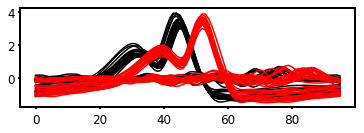

In [301]:
fig =plt.figure(1)

ax1 = plt.subplot(211)

hutch_headers = df.columns
crim_hutch_headers = df_2.columns

inds = df.index.values

for header in hutch_headers:
    ax1.plot(inds, df[header], color ='k')
    
for header in hutch_headers:
    ax1.plot(inds, df_2[header], color = 'r')

    

In [54]:
#hutch_seg = hutch[1010000:1013000]
#musc_seg = musc[1010000:1013000]

hutch_seg = hutch[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]
musc_seg = musc[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]



deltas = np.diff(np.array(-1*hutch_det[crimson_selection_high_1[0][0]-4000:crimson_selection_high_1[0][0]-2000]>thresh,dtype = 'float'))
starts = np.argwhere(deltas>0.5)  #.5
stops = np.argwhere(deltas<-0.5)  #.5
if starts[0] > stops[0]:
    stops = stops[1:]
if stops[-1] < starts[-1]:
    starts = starts[:-1]
    

  
#find the peak changes in the thresholded signal, and find the associated waveform   
hut_intervals = np.hstack((starts,stops))
huttimes = [np.argmax(hutch_seg[sta:stp])+sta for sta,stp in hut_intervals][2:-2]
hut_waveforms = [hutch_seg[pk-52:pk+44] for pk in huttimes]
musc_wave = [musc_seg[pk-52:pk+44] for pk in huttimes]



ax = fig.add_subplot(222)

for i in range(len(hut_waveforms)):
    ax.plot(t, hut_waveforms[i], 'k', alpha = 0.5)

ax.set_ylabel('WBA (rel. units)')
ax.spines['left'].set_bounds(0, 2)
ax.set_ylim((-2, 4))
ax.set_xlim((-0.001, .005))
ax.set_yticks([0, 2])
ax.set_xticks([])
ax.tick_params(axis='both', which='major', pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
ax2 = fig.add_subplot(224)
for i in range(len(musc_wave)):
    ax2.plot(t, musc_wave[i], 'k', alpha = 0.4) #0.5

ax2.set_ylabel('b1 (mV)')
ax2.spines['left'].set_bounds(-0.2, 0.2)
ax2.set_ylim((-2, 1.25))
ax2.set_xlim((-0.001, .005))
ax2.set_yticks([-.2, .2])
ax2.spines['bottom'].set_bounds(-0.001, 0)
ax2.set_xticks([-0.001, 0])
ax2.tick_params(axis='both', which='major', pad=2)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax2.spines['bottom'].set_visible(False)

ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')




In [52]:
###Find crimson onset times ###

idxs= list(range(len(times)))
idxs=np.asarray(idxs)

#crimson_times = zip(times, crimson)
crimson_idxs = zip(idxs, crimson)

stimulus_diff = np.diff(crimson)
crimson_diff_times = zip (idxs, stimulus_diff)

def det_crim_onset(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    #finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
crimson_onset_points = det_crim_onset(.5, crimson_diff_times)

#crimson_onset_times = [x[0] for x in crimson_onset_points]
crimson_onset_indx= [x[0] for x in crimson_onset_points]

In [53]:
freq = np.asarray(bl.segments[0].analogsignals[4])



In [33]:
####WSA (L-R)

L = np.asarray(bl.segments[0].analogsignals[1])
R = np.asarray(bl.segments[0].analogsignals[2])
WSA = L - R

L_times = zip(times, L)
R_times = zip(times, R)
WSA_times = zip(times, WSA)

flydir_save + 'hist_crimson_spikes_s104_b1_01.csv'

for i in range(len(crimson_onset_indx)):
    k= str(i)
    L_clip= pd.DataFrame(L[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    L_clip.to_csv(flydir_save + '01' + k + 'L_analysis.csv', index=False)
    
for i in range(len(crimson_onset_indx)):
    k= str(i)
    R_clip= pd.DataFrame(R[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    R_clip.to_csv(flydir_save + '01' + k + 'R_analysis.csv', index=False)

for i in range(len(crimson_onset_indx)):
    k= str(i)
    WSA_clip= pd.DataFrame(WSA[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    WSA_clip.to_csv(flydir_save + '01' + k + 'WSA_analysis.csv', index=False)

In [34]:
####WBF

freq = np.asarray(bl.segments[0].analogsignals[4])

freq_times = zip(times, freq)

for i in range(len(crimson_onset_indx)):
    k= str(i)
    freq_clip= pd.DataFrame(freq[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    freq_clip.to_csv(flydir_save + '01' + k + 'freq_analysis.csv', index=False)


In [35]:
f3 = crimson

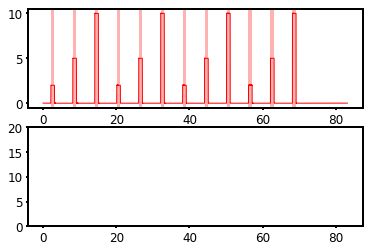

In [36]:
crimson_on = []
crimson_off = []

for f in range(len(f3)):
    if crimson[f]-crimson[f-1]>= 0.5:
        crimson_on.append(f)
    if crimson[f]-crimson[f-1]<= -0.5:
        crimson_off.append(f)


fig =plt.figure(14)

ax1 = plt.subplot(211)
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
for i in range(len(crimson_on)):
    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)

In [37]:
df_inst_phase_upon_signal = pd.DataFrame()

for i in range(len(crimson_on)):
    on_signal = crimson_on[i]
    f = inst_phase[on_signal-5000: on_signal+10000]
    df_inst_phase_upon_signal[i]=f

In [38]:
df_inst_phase_upon_signal.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.107567,0.363970,1.648185,-2.591014,0.270367,0.862978,0.032441,-0.490081,-0.334192,2.463161,1.615018,-0.698808
1,1.134730,0.337791,1.717129,-2.553653,0.300444,0.885641,0.021061,-0.447763,-0.307352,2.508691,1.621921,-0.652951
2,1.161779,0.314004,1.791274,-2.516831,0.330505,0.908376,0.010594,-0.407209,-0.280595,2.554961,1.628582,-0.607153
3,1.188671,0.292681,1.871557,-2.480576,0.360550,0.931172,0.001099,-0.368148,-0.253916,2.601988,1.634947,-0.561405
4,1.215431,0.273914,1.959033,-2.444885,0.390571,0.954019,-0.007376,-0.330355,-0.227306,2.649802,1.640951,-0.515679


In [40]:
new_df_2 = df_inst_phase_upon_signal

'freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'

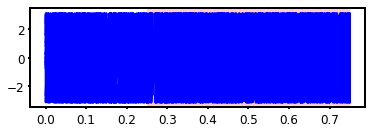

In [44]:
fig =plt.figure(15)

ax1 = plt.subplot(211)

for i in new_df_2:
    ax1.plot(times[0:15000], new_df_2[i], 'b', linewidth =0.5, alpha = 0.2)
    
#ax1.set_ylim((-0.5,100))
#ax1.set_ylimit(-0.1, 100)

mean_df_inst_phase_upon_signal = df_inst_phase_upon_signal.mean(axis=1)
ax1.plot(times[0:15000], df_inst_phase_upon_signal, 'b', linewidth =2.0)

ax1.axvspan(times[5000], times[15000], facecolor = 'r', edgecolor = 'none', alpha = 0.2)

'''
ax1.plot(times, crimson, 'r', linewidth =1.0)

ax2 = plt.subplot(212, sharex=ax1)
ax2.set_ylim(0, 20)
#ax2.set_xlim(20, 80)
#savitzky_golay
'''
'''freq_hat = savgol_filter(b2_frequencies, 7, 5) # window size 51, polynomial order 3'''
#freq_hat= b2_frequencies 
#ax2.plot(times_k, b2_frequencies,'k', linewidth = 0.75)
        
#for i in range(len(crimson_on)):
#    ax1.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)
#    #ax2.axvspan(times[crimson_on[i]], times[crimson_off[i]], facecolor = 'r', edgecolor = 'none', alpha = 0.3)